In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
from pylab import *
import scipy.special
import cmath

In [66]:
# Set the numerical parameters
RMin = 0.0
RMax = 10.0
RMatch = RMax
lOrbital = 0
Step = 0.1
Dim = (RMax-RMin)/Step

# Define your physical parameters
hc = 197.32705
beta = 0.0478450
Rws = 1.2 * 10.0**(0.3333) # This assumes that 10Be is independent from that other neutron
aws = 0.65
V0 = -61.1
E = 0.1

# Set your initial conditions
y0 = 0
yprime0 = 1

# Here we set up the harmonic oscillator potential
def f(R,v):
    F = np.matlib.zeros((2,2))
    F[0,1] = 1
    F[1,0] = lOrbital*(lOrbital+1)/(R*R) + beta * ( V0/(1+exp( (R-Rws)/aws )) - E);
    return F*v


In [67]:
# Define your Hankel functions in terms of the cylindrical Bessel functions
def F(l,r):
    return (math.pi*r/2)**(0.5)*scipy.special.jv(l,r)
def G(l,r):
    return -(math.pi*r/2)**(0.5)*scipy.special.yv(l,r)

def Hplus(l,r):
    return G(l,r) + 1j*F(l,r)
def Hminus(l,r):
    return G(l,r) - 1j*F(l,r)

# And also define their derivatives
def Fprime(l,r):
    return 0.5*(math.pi*r/2)**(-0.5)*scipy.special.jv(l,r) + (math.pi*r/2)**(0.5)*scipy.special.jvp(0, r, 1)
def Gprime(l,r):
    return -0.5*(math.pi*r/2)**(-0.5)*scipy.special.yv(l,r) - (math.pi*r/2)**(0.5)*scipy.special.yvp(0, r, 1)

def Hplusp(l,r):
    return Gprime(l,r) + 1j*Fprime(l,r)
def Hminusp(l,r):
    return Gprime(l,r) - 1j*Fprime(l,r)

In [68]:
y = np.matlib.zeros((2,int(Dim)))
y[0,0] = y0
y[1,0] = yprime0


r = np.linspace(RMin,RMax,Dim)
for i in xrange(1,int(Dim)):
#    print r[i]
    k1 = f(r[i],y[:,i-1])
    k2 = f(r[i] + Step/2, y[:,i-1] + Step/2*k1)
    k3 = f(r[i] + Step/2, y[:,i-1] + Step/2*k2)
    k4 = f(r[i] + Step, y[:,i-1] + Step*k3)
    y[:,i] = y[:,i-1] + Step/6 * (k1 + 2*k2 + 2*k3 + k4)
#    print k1, k2, k3, k4
#    print y


In [77]:
mat = np.zeros((2,2), dtype=complex)
mat[0,0] = y[0,int(Dim-1)]
mat[1,0] = y[1,int(Dim-1)]
mat[0,1] = Hplus(lOrbital, RMatch)
mat[1,1] = Hplusp(lOrbital, RMatch)

vec = np.zeros((2,1), dtype=complex)
vec[0,0] = Hminus(lOrbital, RMatch)
vec[1,0] = Hminusp(lOrbital, RMatch)


params = np.dot(np.linalg.inv(mat),vec)
cl = params[0,0]
Sl = params[1,0] # The other vector component is the scaling factor to account for your derivative guess at R=0
print 'The S-matrix element is $S_L$ = ', Sl         # See eqns 6.1.7 and 6.1.8 in Filomena's book for details
print 'which has magnitude', abs(Sl), 'and corresponds to a phase $delta_L = $', 1/(2*1j)*cmath.log(Sl)

The S-matrix element is $S_L$ =  (0.698728050737-0.715387385347j)
which has magnitude 1.0 and corresponds to a phase $delta_L = $ (-0.398589182166-4.16333634234e-17j)


In [80]:
#print mat; vec; cl
print cl
print cl*y.A[0,int(Dim-1)]
print Hminus(lOrbital,RMatch)-Sl*Hplus(lOrbital,RMatch)

(2.15384040257+5.11441658546j)
(0.630831638924+1.49794561979j)
(0.630831638924+1.49794561979j)


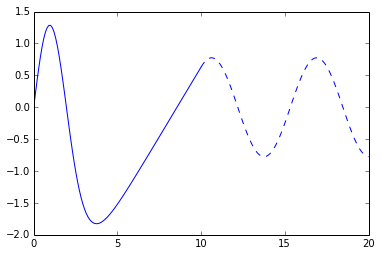

In [81]:
plt.plot(r, cl*y.A[0,:], 'b-')
plt.plot(r+RMatch, Hminus(lOrbital,r+RMatch)-Sl*Hplus(lOrbital,r+RMatch), 'b--')

In [7]:
#plt.plot(r, y.A[0,:], 'b-') #y.A Turns the matrix into an array
#plt.axis([0,4.6,0.0, 0.025])
#plt.xlabel(r'$r$')
#plt.ylabel(r'$u_L(r)$')
#plt.title(r'Radial probability distributions for three lowest-lying states')
#plt.savefig('eigenvector.pdf')
#plt.savefig('eigenvector.png')
#plt.show()